In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = 'pulsar_data_train.csv'

df = pd.read_csv(data)

<b>Operations on Data</b>

In [3]:
#size of dataset
df.shape 

(12528, 9)

In [5]:
#preview of dataset 
df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In this there are 9 columns from which 8 having continuous values but target class have discrete values.

In [6]:
#column names

column_names = df.columns

column_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In this for easy access of columns names are changed. In which IP stands for Integrated profile and DM-SNR stands for delta modulation and signal to noise ratio.

In [7]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [8]:
#for checking what different values and their frequncy 

df['target_class'].value_counts()
df['target_class'].value_counts()/np.float(len(df))

<ipython-input-8-5eabe7e9e4a8>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['target_class'].value_counts()/np.float(len(df))


0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [9]:
df.isnull().sum() #for checking null values

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [10]:
print("duplicate rows in training data: ",df.duplicated().sum())  # for duplicate rows

duplicate rows in training data:  0


In [11]:
# filling null values

df['IP Kurtosis']= df['IP Kurtosis'].fillna(df['IP Kurtosis'].median())
df['DM-SNR Sd']= df['DM-SNR Sd'].fillna(df['DM-SNR Sd'].median())
df['DM-SNR Skewness']= df['DM-SNR Skewness'].fillna(df['DM-SNR Skewness'].median())

In [12]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

<b>Detection of Outliers

<AxesSubplot:title={'center':'With Outliers'}>

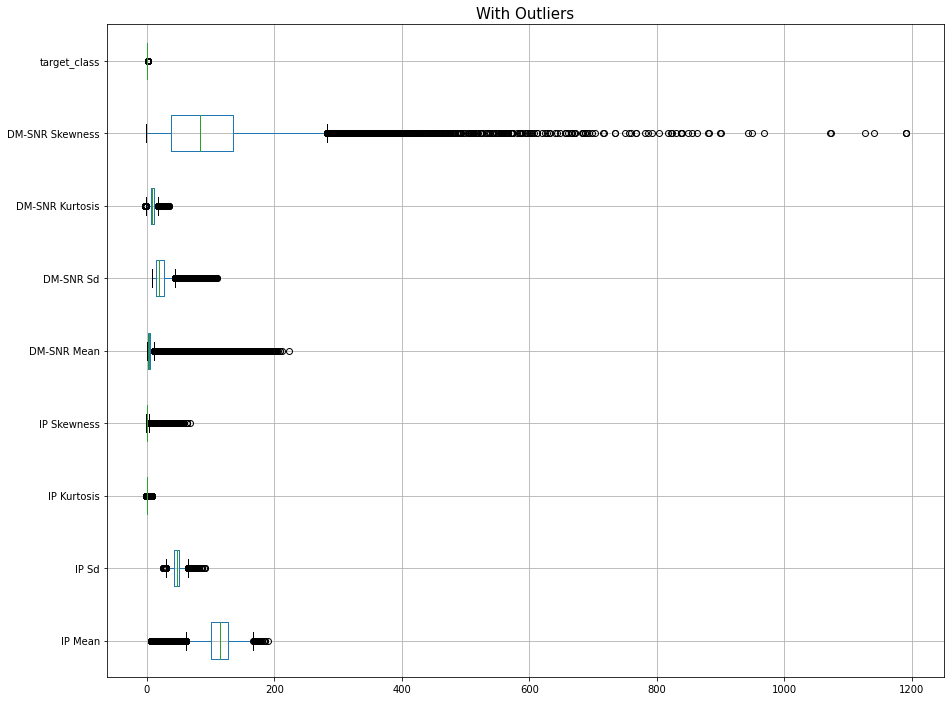

In [14]:
plt.figure(figsize=(15,12))
plt.title('With Outliers',fontsize=15)
df.boxplot(vert=0)

In [15]:
# checking number of outliers

left_part = df.quantile(.25)
right_part = df.quantile(.75)

mid = right_part - left_part # as per normalisation part it is 2*standard deviation
s = mid/2

#all values must be in - 4*s  to 4*s
lower_range = left_part - s*3
higher_range = right_part + s*3

print("outliers in each columns : ")
((df<lower_range)|(df>higher_range)).sum()


outliers in each columns : 


IP Mean             717
IP Sd               178
IP Kurtosis        1112
IP Skewness        1340
DM-SNR Mean        2047
DM-SNR Sd          1693
DM-SNR Kurtosis     349
DM-SNR Skewness     696
target_class       1153
dtype: int64

In [16]:
print("in percentage :")
((df<lower_range)|(df>higher_range)).sum()*100/len(df)

in percentage :


IP Mean             5.723180
IP Sd               1.420817
IP Kurtosis         8.876117
IP Skewness        10.696041
DM-SNR Mean        16.339400
DM-SNR Sd          13.513729
DM-SNR Kurtosis     2.785760
DM-SNR Skewness     5.555556
target_class        9.203384
dtype: float64

## **Data representation**

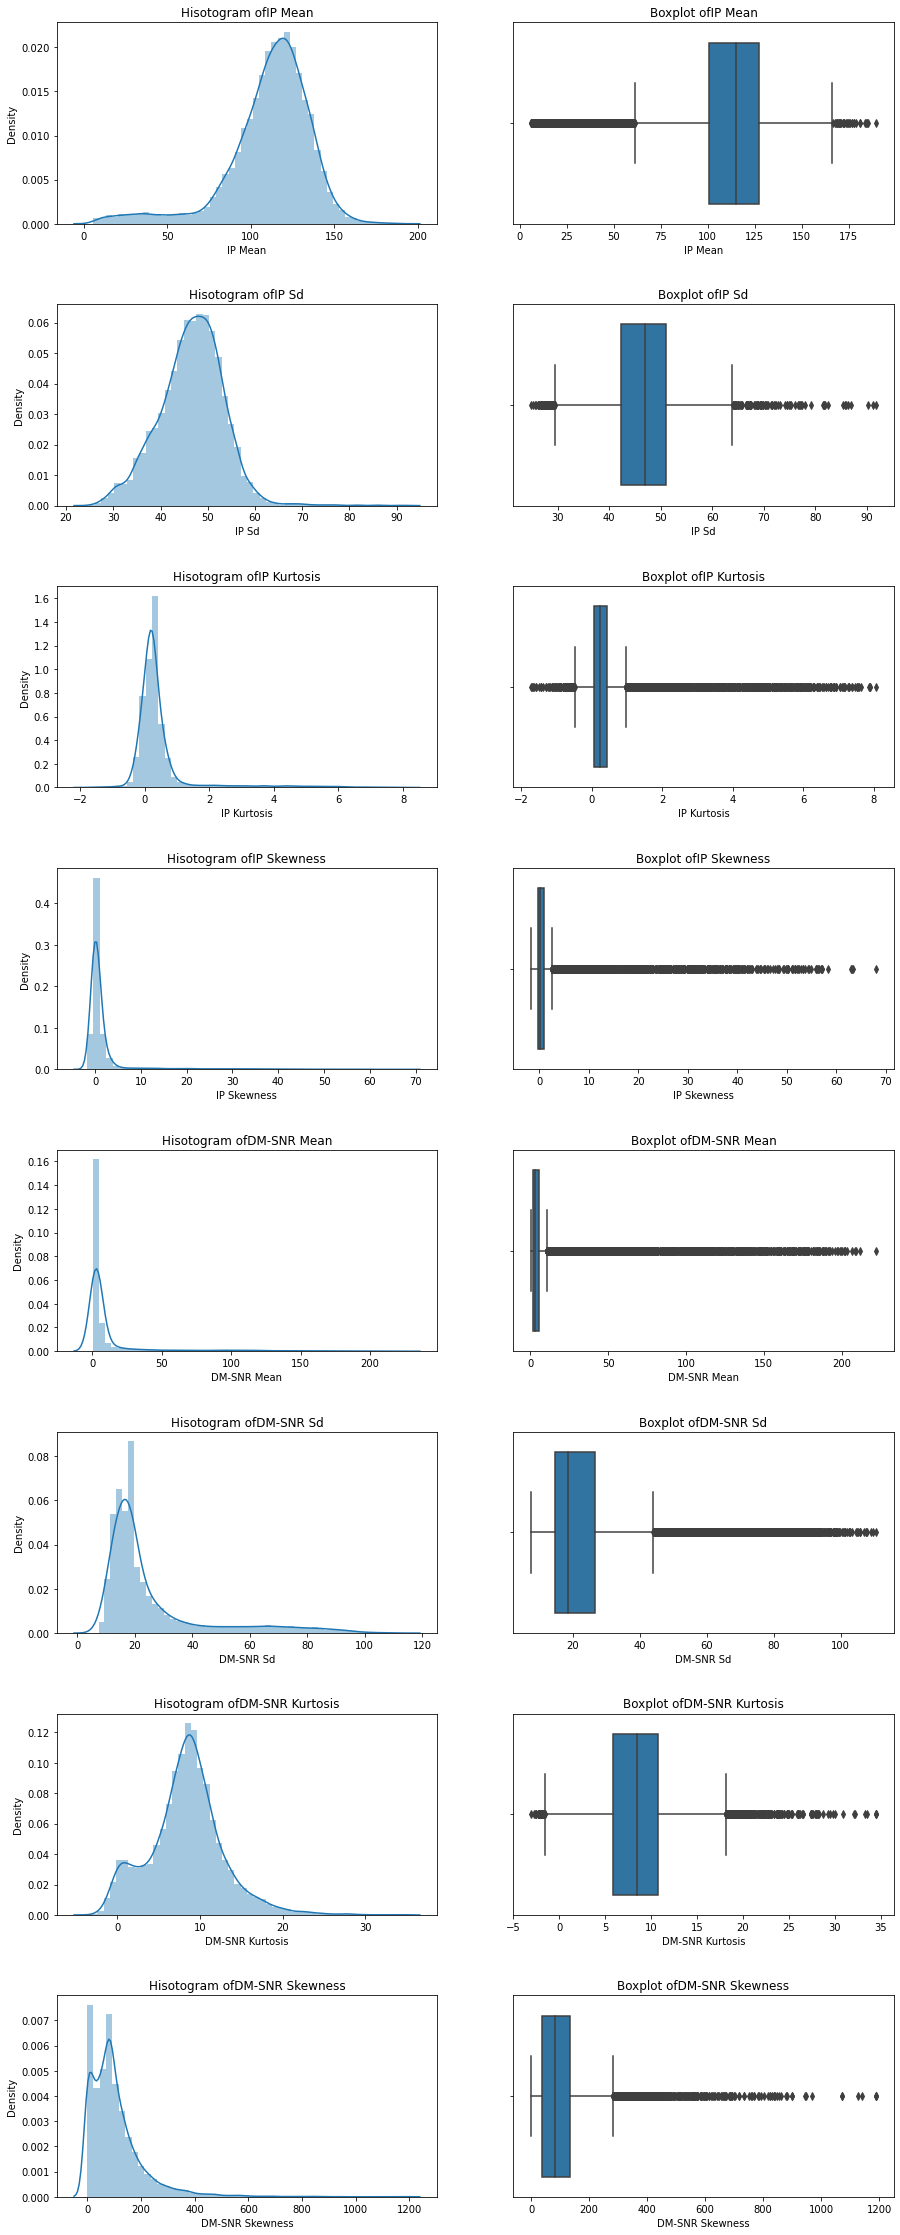

In [52]:
fig, axes = plt.subplots(nrows=8,ncols=2,  figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(df.columns)-1):
  sns.distplot(df[df.columns[i]], ax=axes[i][0]).set_title("Hisotogram of" + df.columns[i])
  sns.boxplot(df[df.columns[i]], ax=axes[i][1]).set_title("Boxplot of" + df.columns[i])

Comparison of pulsar and non pulsar class

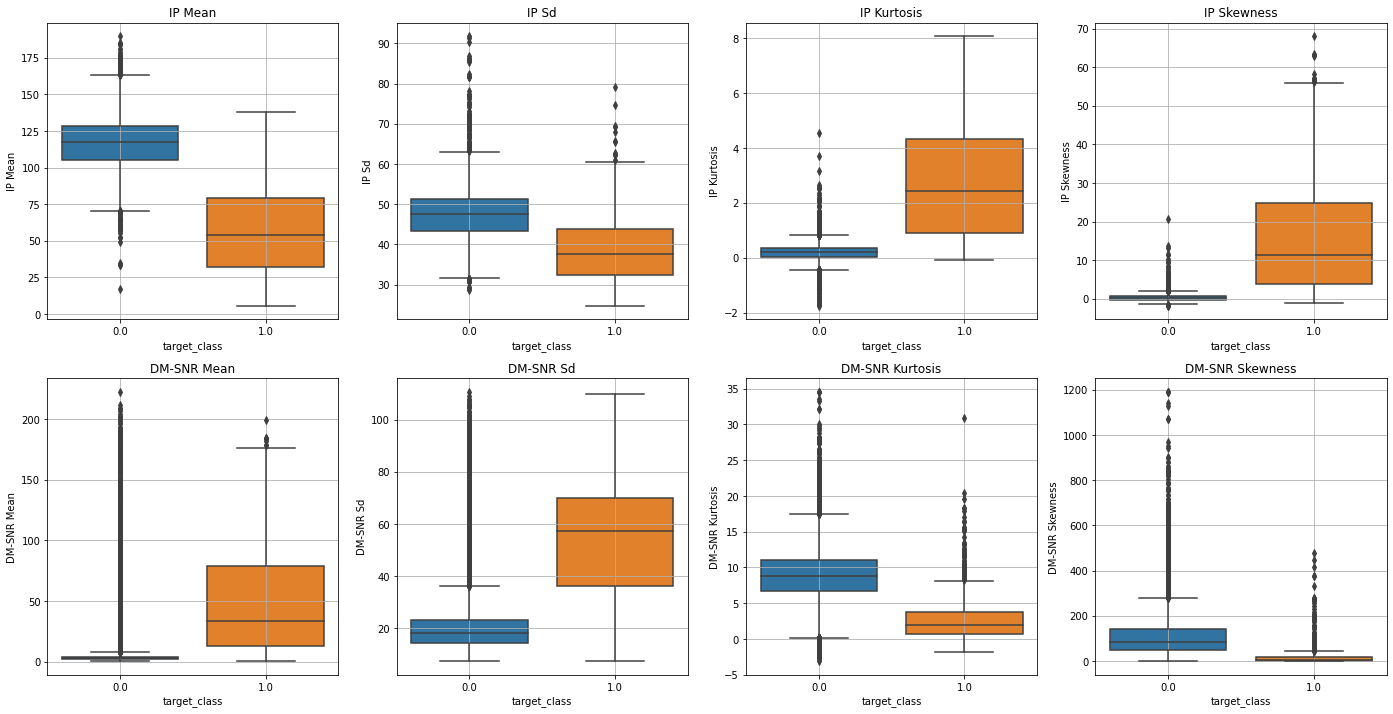

In [18]:
fig=plt.figure(figsize=(24,12))
for i in range(0,len(df.columns)-1):
    ax=fig.add_subplot(2,4,i+1).set_title(df.columns[i])
    sns.boxplot(x = 'target_class', y = df.columns[i], data = df)
    plt.grid()

Splitting Dataset

In [19]:
x = df.drop('target_class',axis=1)
y = df[['target_class']]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=1)

SS = StandardScaler();
x_trains = SS.fit_transform(x_train)
x_tests = SS.transform(x_test)

## Model Making

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,plot_confusion_matrix

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

Class of different Models

In [22]:
# Mean 10 fold cross validation scores for train and test set

# This is using class 

class decision_tree_method:
    # def __init__(self):
    #     DT = DecisionTreeClassifier(random_state=1)
    #     DT.fit(x_trains,y_train)
        
    #     DT_random = DecisionTreeClassifier(max_depth=5,max_features=4,min_samples_leaf=525,min_samples_split=2593,criterion='entropy',random_state=1)
    #     DT_random.fit(x_trains,y_train)
        
    def decision_tree(self):
        
        DT = DecisionTreeClassifier(random_state=1)
        DT.fit(x_trains,y_train)

        
        
        DT_train_predict = DT.predict(x_trains)
        DT_test_predict = DT.predict(x_tests)

        
        DT_prob_train = DT.predict_proba(x_trains)
        DT_prob_test = DT.predict_proba(x_tests)


        
        print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, DT.predict(x_trains)),'\n')
        print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, DT.predict(x_tests)),'\n')
        
        print('Train set CV scores: %0.4f'%np.mean(cross_val_score(DT,x_train,y_train,cv=10)),'\n')
        print('Test set CV scores: %.4f'%np.mean(cross_val_score(DT,x_test,y_test,cv=10)),'\n')
        
        DT_df_train=pd.DataFrame(classification_report(y_train, DT_train_predict,output_dict=True)).transpose()
        DT_df_test=pd.DataFrame(classification_report(y_test, DT_test_predict,output_dict=True)).transpose()
        
    
class random_forest_method:
    # def __init__(self):
    #     RF = RandomForestClassifier(random_state=1) 
    #     RF.fit(x_trains, y_train)
        
        
    def random_forest(self):
        RF = RandomForestClassifier(random_state=1) 
        RF.fit(x_trains, y_train)
        
        

        RF_train_predict = RF.predict(x_trains)
        RF_test_predict = RF.predict(x_tests)


        RF_prob_train = RF.predict_proba(x_trains)
        RF_prob_test = RF.predict_proba(x_tests)

        
        print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF.predict(x_trains)),'\n')
        print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF.predict(x_tests)),'\n')
        
        print('Train set CV scores: %0.4f'%np.mean(cross_val_score(RF,x_train,y_train,cv=10)),'\n')
        print('Test set CV scores: %.4f'%np.mean(cross_val_score(RF,x_test,y_test,cv=10)),'\n')
        

        RF_df_train=pd.DataFrame(classification_report(y_train, RF_train_predict,output_dict=True)).transpose()
        RF_df_test=pd.DataFrame(classification_report(y_test, RF_test_predict,output_dict=True)).transpose()
        
class logistic_regression_method:
    # def __init__(self):
        # LR = LogisticRegression(random_state=1)
        # LR.fit(x_trains,y_train)

        
    def logistic_regression_model(self):
        LR = LogisticRegression(random_state=1)
        LR.fit(x_trains,y_train)
        

        LR_train_predict = LR.predict(x_trains)
        LR_test_predict = LR.predict(x_tests)


        LR_prob_train = LR.predict_proba(x_trains)
        LR_prob_test = LR.predict_proba(x_tests)


        
        print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, LR.predict(x_trains)),'\n')
        print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, LR.predict(x_tests)),'\n')
        
        print('Train set CV scores: %0.4f'%np.mean(cross_val_score(LR,x_train,y_train,cv=10)),'\n')
        print('Test set CV scores: %.4f'%np.mean(cross_val_score(LR,x_test,y_test,cv=10)),'\n')
        
        

        LR_df_train=pd.DataFrame(classification_report(y_train, LR_train_predict,output_dict=True)).transpose()
        LR_df_test=pd.DataFrame(classification_report(y_test, LR_test_predict,output_dict=True)).transpose()
        
        
        
class naive_bayes:
    def __init__(self):
        NB = GaussianNB()
        NB.fit(x_trains,y_train)
        
        
        NB_train_predict = NB.predict(x_trains)
        NB_test_predict = NB.predict(x_tests)

        NB_prob_train = NB.predict_proba(x_trains)
        NB_prob_test = NB.predict_proba(x_tests)

        
        
        print('Train set CV scores: %0.4f'%np.mean(cross_val_score(NB,x_train,y_train,cv=10)),'\n')
        print('Test set CV scores: %.4f'%np.mean(cross_val_score(NB,x_test,y_test,cv=10)),'\n')
        
        
    
        NB_df_train=pd.DataFrame(classification_report(y_train, NB_train_predict,output_dict=True)).transpose()
        NB_df_test=pd.DataFrame(classification_report(y_test, NB_test_predict,output_dict=True)).transpose()
        
        print("For Training set : \n",NB_df_train,'\n')
        print("For Testing set : \n",NB_df_test,'\n')

class SVM_train:
    # def __init__(self):
    #     SVM = svm.SVC(random_state=1)
    #     SVM.fit(x_trains, y_train)
        

        
    def svm_basic(self):
        SVM = svm.SVC(random_state=1)
        SVM.fit(x_trains, y_train)
        
        
        
        SVM_train_predict = SVM.predict(x_trains)
        SVM_test_predict = SVM.predict(x_tests)
        
        
        print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM.predict(x_trains)),'\n')
        print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM.predict(x_tests)),'\n')
        
        
        print('Train set CV scores: %0.4f'%np.mean(cross_val_score(SVM, x_trains, y_train, cv=10)),'\n')
        print('Test set CV scores: %0.4f'%np.mean(cross_val_score(SVM, x_tests, y_test, cv=10)),'\n')
        
        
        SVM_df_train=pd.DataFrame(classification_report(y_train, SVM_train_predict,output_dict=True)).transpose()
        SVM_df_test=pd.DataFrame(classification_report(y_test, SVM_test_predict,output_dict=True)).transpose()
        

    def svm_rbf(self):
        SVM_random = svm.SVC(C=1,degree=2, gamma=0.1, kernel='rbf',tol=0.001, random_state=1)
        SVM_random.fit(x_trains, y_train)
                
        print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_random.predict(x_trains)),'\n')
        print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_random.predict(x_tests)),'\n')
                
                
        print('Train set CV scores: %0.4f'%np.mean(cross_val_score(SVM_random, x_trains, y_train, cv=10)),'\n')
        print('Test set CV scores: %0.4f'%np.mean(cross_val_score(SVM_random, x_tests, y_test, cv=10)),'\n')
        
        
        
        
        


## Decision Tree Model

In [23]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(x_trains,y_train)

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, DT.predict(x_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, DT.predict(x_tests)),'\n')
        
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(DT,x_train,y_train,cv=10)),'\n')
print('Test set CV scores: %.4f'%np.mean(cross_val_score(DT,x_test,y_test,cv=10)),'\n')
                
DT_train_predict = DT.predict(x_trains)
DT_test_predict = DT.predict(x_tests)


DT_prob_train = DT.predict_proba(x_trains)
DT_prob_test = DT.predict_proba(x_tests)



DT_df_train=pd.DataFrame(classification_report(y_train, DT_train_predict,output_dict=True)).transpose()
DT_df_test=pd.DataFrame(classification_report(y_test, DT_test_predict,output_dict=True)).transpose()

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9096
         1.0       1.00      1.00      1.00       926

    accuracy                           1.00     10022
   macro avg       1.00      1.00      1.00     10022
weighted avg       1.00      1.00      1.00     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2279
         1.0       0.77      0.85      0.81       227

    accuracy                           0.96      2506
   macro avg       0.88      0.91      0.89      2506
weighted avg       0.97      0.96      0.96      2506
 

Train set CV scores: 0.9660 

Test set CV scores: 0.9685 



In [24]:
dt_obj = decision_tree_method()
print("Decision Tree based model: \n")
dt_obj.decision_tree()



Decision Tree based model: 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9096
         1.0       1.00      1.00      1.00       926

    accuracy                           1.00     10022
   macro avg       1.00      1.00      1.00     10022
weighted avg       1.00      1.00      1.00     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2279
         1.0       0.77      0.85      0.81       227

    accuracy                           0.96      2506
   macro avg       0.88      0.91      0.89      2506
weighted avg       0.97      0.96      0.96      2506
 

Train set CV scores: 0.9660 

Test set CV scores: 0.9685 



## Random Forest

In [36]:
RF = RandomForestClassifier(random_state=1) 
RF.fit(x_trains, y_train)

        
print('this is for Random forest :\n')
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, RF.predict(x_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, RF.predict(x_tests)),'\n')
        
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(RF,x_train,y_train,cv=10)),'\n')
print('Test set CV scores: %.4f'%np.mean(cross_val_score(RF,x_test,y_test,cv=10)),'\n')

        
RF_train_predict = RF.predict(x_trains)
RF_test_predict = RF.predict(x_tests)

RF_prob_train = RF.predict_proba(x_trains)
RF_prob_test = RF.predict_proba(x_tests)

        
RF_df_train=pd.DataFrame(classification_report(y_train, RF_train_predict,output_dict=True)).transpose()
RF_df_test=pd.DataFrame(classification_report(y_test, RF_test_predict,output_dict=True)).transpose()

this is for Random forest :

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9096
         1.0       1.00      1.00      1.00       926

    accuracy                           1.00     10022
   macro avg       1.00      1.00      1.00     10022
weighted avg       1.00      1.00      1.00     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.91      0.83      0.87       227

    accuracy                           0.98      2506
   macro avg       0.95      0.91      0.93      2506
weighted avg       0.98      0.98      0.98      2506
 

Train set CV scores: 0.9784 

Test set CV scores: 0.9777 



In [79]:
rf = random_forest_method()
print("Random Forest: \n")
rf.random_forest()

Random Forest: 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9096
         1.0       1.00      1.00      1.00       926

    accuracy                           1.00     10022
   macro avg       1.00      1.00      1.00     10022
weighted avg       1.00      1.00      1.00     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.91      0.83      0.87       227

    accuracy                           0.98      2506
   macro avg       0.95      0.91      0.93      2506
weighted avg       0.98      0.98      0.98      2506
 

Train set CV scores: 0.9784 

Test set CV scores: 0.9777 



## Logisic Model 

In [39]:
LR = LogisticRegression(random_state=1)
LR.fit(x_trains,y_train)

print("this is Logistic regression : \n")        
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, LR.predict(x_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, LR.predict(x_tests)),'\n')
        
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(LR,x_train,y_train,cv=10)),'\n')
print('Test set CV scores: %.4f'%np.mean(cross_val_score(LR,x_test,y_test,cv=10)),'\n')


        
LR_train_predict = LR.predict(x_trains)
LR_test_predict = LR.predict(x_tests)

LR_prob_train = LR.predict_proba(x_trains)
LR_prob_test = LR.predict_proba(x_tests)


        
LR_df_train=pd.DataFrame(classification_report(y_train, LR_train_predict,output_dict=True)).transpose()
LR_df_test=pd.DataFrame(classification_report(y_test, LR_test_predict,output_dict=True)).transpose()

this is Logistic regression : 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9096
         1.0       0.95      0.79      0.86       926

    accuracy                           0.98     10022
   macro avg       0.96      0.89      0.92     10022
weighted avg       0.98      0.98      0.98     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.92      0.79      0.85       227

    accuracy                           0.97      2506
   macro avg       0.95      0.89      0.92      2506
weighted avg       0.97      0.97      0.97      2506
 

Train set CV scores: 0.9760 

Test set CV scores: 0.9761 



In [28]:
obj = logistic_regression_method()
print("Logistic resgression Model: \n")
obj.logistic_regression_model()



Logistic resgression Model: 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9096
         1.0       0.95      0.79      0.86       926

    accuracy                           0.98     10022
   macro avg       0.96      0.89      0.92     10022
weighted avg       0.98      0.98      0.98     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.92      0.79      0.85       227

    accuracy                           0.97      2506
   macro avg       0.95      0.89      0.92      2506
weighted avg       0.97      0.97      0.97      2506
 

Train set CV scores: 0.9760 

Test set CV scores: 0.9761 



### Naive Bayes Model

In [29]:
NB = GaussianNB()
NB.fit(x_trains, y_train)

print('Train set CV scores: %0.4f' % np.mean(
    cross_val_score(NB, x_train, y_train, cv=10)), '\n')
print('Test set CV scores: %.4f' % np.mean(
    cross_val_score(NB, x_test, y_test, cv=10)), '\n')

# Prediction for final model
NB_train_predict = NB.predict(x_trains)
NB_test_predict = NB.predict(x_tests)

# Probability Prediction for final model
NB_prob_train = NB.predict_proba(x_trains)
NB_prob_test = NB.predict_proba(x_tests)



# Classification report in a dataframe of final model
NB_df_train = pd.DataFrame(classification_report(
    y_train, NB_train_predict, output_dict=True)).transpose()
NB_df_test = pd.DataFrame(classification_report(
    y_test, NB_test_predict, output_dict=True)).transpose()


Train set CV scores: 0.9430 

Test set CV scores: 0.9437 



In [30]:
print("Naive Bayes model :\n")
mod = naive_bayes()


Naive Bayes model :

Train set CV scores: 0.9430 

Test set CV scores: 0.9437 

For Training set : 
               precision    recall  f1-score       support
0.0            0.983435  0.952946  0.967951   9096.000000
1.0            0.645695  0.842333  0.731022    926.000000
accuracy       0.942726  0.942726  0.942726      0.942726
macro avg      0.814565  0.897639  0.849486  10022.000000
weighted avg   0.952229  0.942726  0.946059  10022.000000 

For Testing set : 
               precision    recall  f1-score      support
0.0            0.984047  0.947345  0.965348  2279.000000
1.0            0.615385  0.845815  0.712430   227.000000
accuracy       0.938148  0.938148  0.938148     0.938148
macro avg      0.799716  0.896580  0.838889  2506.000000
weighted avg   0.950653  0.938148  0.942438  2506.000000 



## SVM Model

In [31]:
SVM = svm.SVC(random_state=1)
SVM.fit(x_trains, y_train)

print('this is SVM model: \n')        
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM.predict(x_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM.predict(x_tests)),'\n')
         
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(SVM, x_trains, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(SVM, x_tests, y_test, cv=10)),'\n')
        
SVM_random = svm.SVC(C=1,degree=2, gamma=0.1, kernel='rbf', random_state=1)
SVM_random.fit(x_trains, y_train)
        
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_random.predict(x_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_random.predict(x_tests)),'\n')
        
        
print('Train set CV scores: %0.4f'%np.mean(cross_val_score(SVM_random, x_trains, y_train, cv=10)),'\n')
print('Test set CV scores: %0.4f'%np.mean(cross_val_score(SVM_random, x_tests, y_test, cv=10)),'\n')
        

SVM = svm.SVC(random_state=1)
SVM.fit(x_trains, y_train)
        
SVM_train_predict = SVM.predict(x_trains)
SVM_test_predict = SVM.predict(x_tests)


        
SVM_df_train=pd.DataFrame(classification_report(y_train, SVM_train_predict,output_dict=True)).transpose()
SVM_df_test=pd.DataFrame(classification_report(y_test, SVM_test_predict,output_dict=True)).transpose()

this is SVM model: 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9096
         1.0       0.95      0.82      0.88       926

    accuracy                           0.98     10022
   macro avg       0.96      0.91      0.93     10022
weighted avg       0.98      0.98      0.98     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.93      0.81      0.87       227

    accuracy                           0.98      2506
   macro avg       0.96      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506
 

Train set CV scores: 0.9775 

Test set CV scores: 0.9781 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9096
         1.0       

In [33]:
print("SVM model : \n")
svm_model = SVM_train()
svm_model.svm_basic()

print('in SVM RBF function: \n')
svm_model.svm_rbf()


SVM model : 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9096
         1.0       0.95      0.82      0.88       926

    accuracy                           0.98     10022
   macro avg       0.96      0.91      0.93     10022
weighted avg       0.98      0.98      0.98     10022
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.93      0.81      0.87       227

    accuracy                           0.98      2506
   macro avg       0.96      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506
 

Train set CV scores: 0.9775 

Test set CV scores: 0.9781 

in SVM RBF function: 

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9096
   

## Comparison

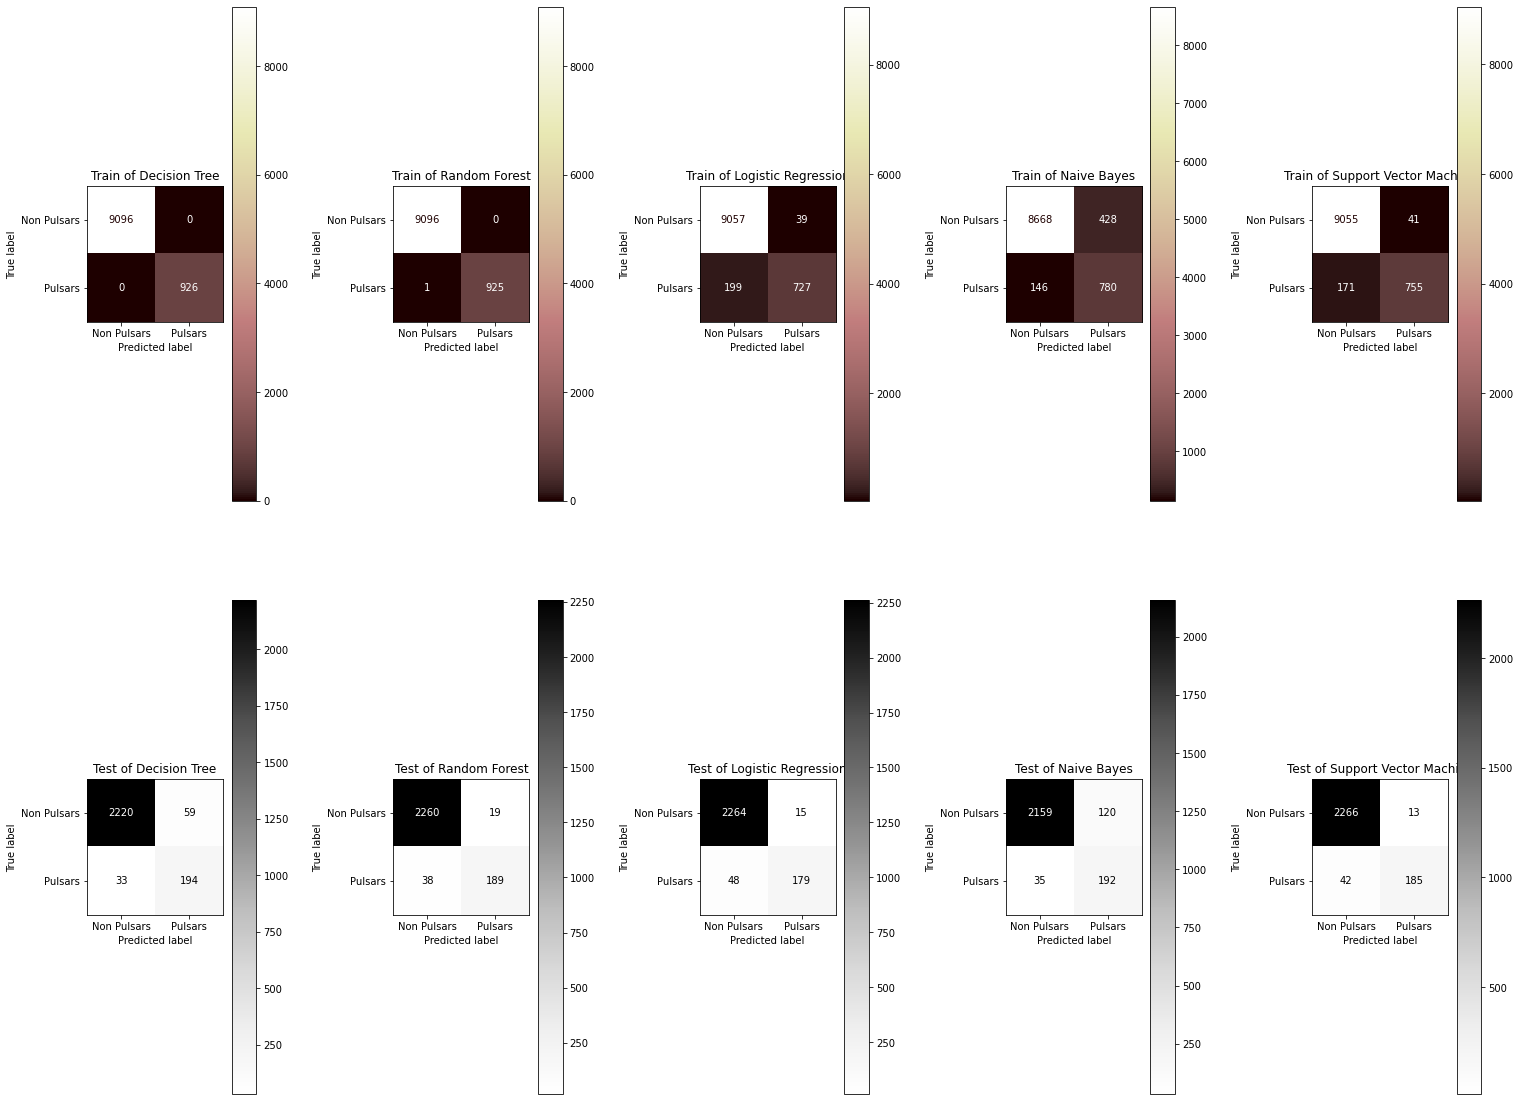

In [43]:
models = {"DT":DT,"RF":RF,"LR":LR,"NB":NB,"SVM":SVM}

model = [DT,RF,LR,NB,SVM]
model_name = ['Decision Tree','Random Forest','Logistic Regression','Naive Bayes','Support Vector Machine']

fig, axes = plt.subplots(nrows=2,ncols=5,  figsize=(25, 20))
fig.subplots_adjust(wspace=0.8)
idx = 0
for m,n in zip(model,model_name):
  plot_confusion_matrix(m,x_trains,y_train,cmap='pink',display_labels=['Non Pulsars','Pulsars'],values_format = '.0f', ax=axes[0][idx]);
  axes[0][idx].set_title("Train of " + n)
  plot_confusion_matrix(m,x_tests,y_test,cmap='Greys',display_labels=['Non Pulsars','Pulsars'],values_format = '.0f', ax=axes[1][idx]);
  axes[1][idx].set_title("Test of " + n)
  idx=idx+1


In [44]:
index=['Accuracy', 'Recall','Precision','F1_Score']
data = pd.DataFrame({'DT Train':[DT_df_train.loc["accuracy"][0],DT_df_train.loc["1.0"][1],DT_df_train.loc["1.0"][0],DT_df_train.loc["1.0"][2]],
                     'DT Test':[DT_df_test.loc["accuracy"][0],DT_df_test.loc["1.0"][1],DT_df_test.loc["1.0"][0],DT_df_test.loc["1.0"][2]],
                     'RF Train':[RF_df_train.loc["accuracy"][0],RF_df_train.loc["1.0"][1],RF_df_train.loc["1.0"][0],RF_df_train.loc["1.0"][2]],
                     'RF Test':[RF_df_test.loc["accuracy"][0],RF_df_test.loc["1.0"][1],RF_df_test.loc["1.0"][0],RF_df_test.loc["1.0"][2]],
                     'LR Train':[LR_df_train.loc["accuracy"][0],LR_df_train.loc["1.0"][1],LR_df_train.loc["1.0"][0],LR_df_train.loc["1.0"][2]],
                     'LR Test':[LR_df_test.loc["accuracy"][0],LR_df_test.loc["1.0"][1],LR_df_test.loc["1.0"][0],LR_df_test.loc["1.0"][2]],
                     'NB Train':[NB_df_train.loc["accuracy"][0],NB_df_train.loc["1.0"][1],NB_df_train.loc["1.0"][0],NB_df_train.loc["1.0"][2]],
                     'NB Test':[NB_df_test.loc["accuracy"][0],NB_df_test.loc["1.0"][1],NB_df_test.loc["1.0"][0],NB_df_test.loc["1.0"][2]],
                     'SVM Train':[SVM_df_train.loc["accuracy"][0],SVM_df_train.loc["1.0"][1],SVM_df_train.loc["1.0"][0],SVM_df_train.loc["1.0"][2]],
                     'SVM Test':[SVM_df_test.loc["accuracy"][0],SVM_df_test.loc["1.0"][1],SVM_df_test.loc["1.0"][0],SVM_df_test.loc["1.0"][2]]
                     },index=index)
data = round(data,3)

In [45]:
data


,DT Train,DT Test,RF Train,RF Test,LR Train,LR Test,NB Train,NB Test,SVM Train,SVM Test
Accuracy,1.0,0.963,1.000,0.977,0.976,0.975,0.943,0.938,0.979,0.978
Recall,1.0,0.855,0.999,0.833,0.785,0.789,0.842,0.846,0.815,0.815
Precision,1.0,0.767,1.000,0.909,0.949,0.923,0.646,0.615,0.948,0.934
F1_Score,1.0,0.808,0.999,0.869,0.859,0.850,0.731,0.712,0.877,0.871


In [47]:
import plotly.express as px
Data = data.T
Data['Model'] = Data.index
Data = Data.reset_index() 


In [61]:
Data
a = Data.iloc[[1,3,5,7,9]]
# b = data.iloc[[1,3,5,7,9]]
a

,index,Accuracy,Recall,Precision,F1_Score,Model
1,DT Test,0.963,0.855,0.767,0.808,DT Test
3,RF Test,0.977,0.833,0.909,0.869,RF Test
5,LR Test,0.975,0.789,0.923,0.850,LR Test
7,NB Test,0.938,0.846,0.615,0.712,NB Test
9,SVM Test,0.978,0.815,0.934,0.871,SVM Test


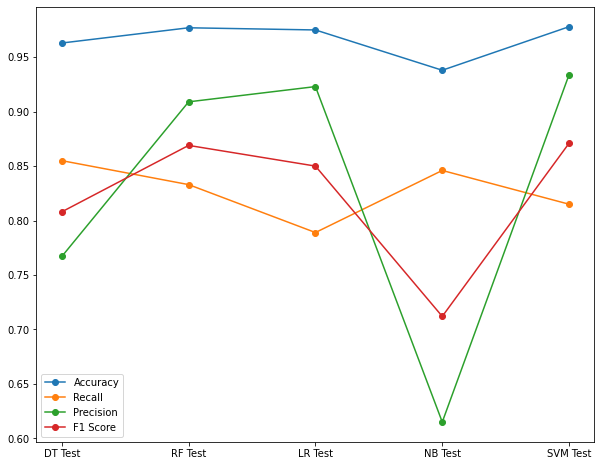

In [65]:
plt.figure(figsize=(10,8))
plt.plot(a.Model,a.Accuracy,label="Accuracy",marker='o')
plt.plot(a.Model,a.Recall,label="Recall",marker='o')
plt.plot(a.Model,a.Precision,label="Precision",marker='o')
plt.plot(a.Model,a.F1_Score,label="F1 Score",marker='o')
plt.legend()
plt.show()

## preparing Test set

In [66]:
test_set = pd.read_csv('pulsar_data_test.csv')
test_set1 = test_set.copy()
x = test_set.drop('target_class',axis=1)
y = test_set[['target_class']]

test_set = test_set.drop('target_class',axis=1)


In [67]:
test_set.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness']

In [68]:
test_set.isnull().sum()

test_set['IP Kurtosis']= test_set['IP Kurtosis'].fillna(test_set['IP Kurtosis'].median())
test_set['DM-SNR Sd']= test_set['DM-SNR Sd'].fillna(test_set['DM-SNR Sd'].median())
test_set['DM-SNR Skewness']= test_set['DM-SNR Skewness'].fillna(test_set['DM-SNR Skewness'].median())


In [69]:
#Scaling the data 

test_scaled = SS.transform(test_set)
test_scaled1 = test_scaled.copy()

In [70]:
predictions = SVM.predict(test_scaled)

In [71]:
predictions

array([0., 1., 0., ..., 0., 0., 0.])

# in terms of class

In [80]:
# Mean 10 fold cross validation scores for train and test set

class testing:
        
    def decision_tree_test(self):

        
        DT_test_predict = DT.predict(test_scaled)

        DT_prob_test = DT.predict_proba(test_scaled)
    
        print(DT_test_predict)
        # print(DT_prob_test)
        
    def random_forest(self):
        

        RF_test_predict = RRF.predict(test_scaled)

        RF_prob_test = RF.predict_proba(test_scaled)

        print(RF_test_predict)
        # print(RF_prob_test)
        

    def logistic_regression_model(self):
        
        

        LR_test_predict = LR.predict(test_scaled1)

        LR_prob_test = LR.predict_proba(test_scaled1)

        print(LR_test_predict)
        # print(LR_prob_test)
        
    def naive_bayes_test(self):

        
        NB_test_predict = NB.predict(test_scaled1)

        NB_prob_test = NB.predict_proba(test_scaled1)
    
        print(NB_test_predict)
        # print(NB_prob_test)        

    def SVM_test(self):
    

        SVM_test_predict = SVM.predict(test_scaled1)
        
       
        print(SVM_test_predict)       
        
        


In [81]:
must_test = testing()
must_test.decision_tree_test()


[0. 1. 0. ... 0. 0. 0.]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [82]:
must_test = testing()
must_test.SVM_test()

[0. 1. 0. ... 0. 0. 0.]
